In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df=pd.read_csv('./train_set.csv', low_memory=False)
df.head()

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
1,46560345,32,9/17/2017 17:51,9/17/2017 18:23,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
3,129547190,138,9/22/2019 11:27,9/22/2019 13:45,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
4,136619463,14,1/31/2020 17:11,1/31/2020 17:25,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              700000 non-null  int64  
 1   duration             700000 non-null  int64  
 2   start_time           700000 non-null  object 
 3   end_time             700000 non-null  object 
 4   start_lat            694437 non-null  float64
 5   start_lon            694437 non-null  float64
 6   end_lat              681426 non-null  float64
 7   end_lon              681426 non-null  float64
 8   bike_id              700000 non-null  object 
 9   plan_duration        699792 non-null  float64
 10  trip_route_category  700000 non-null  object 
 11  passholder_type      697424 non-null  object 
 12  start_station        700000 non-null  int64  
 13  end_station          700000 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 74.8+ M

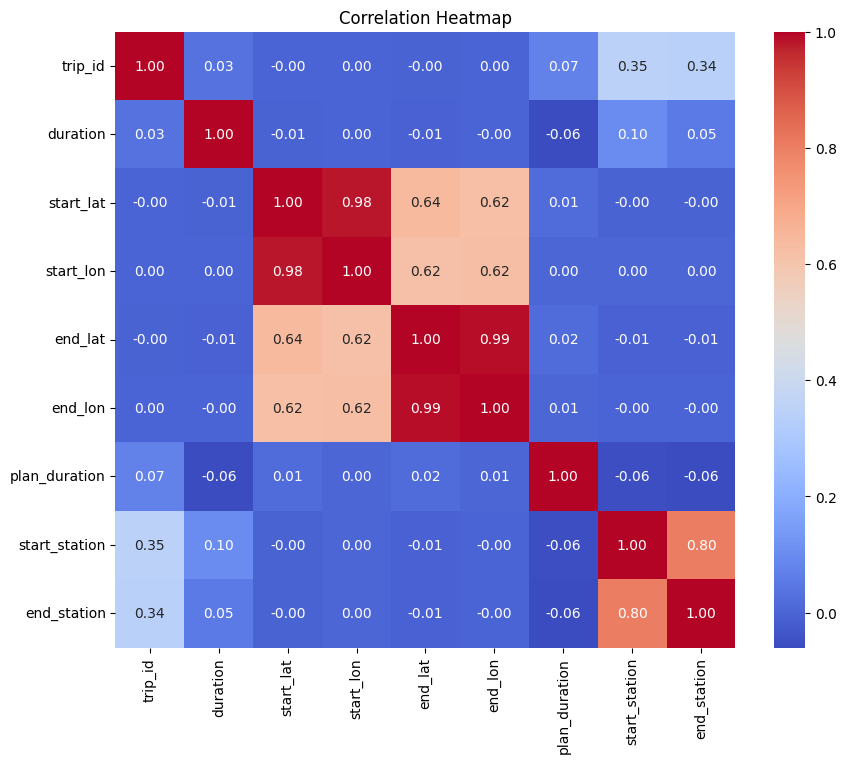


Visualizing Distributions of Numeric Columns:


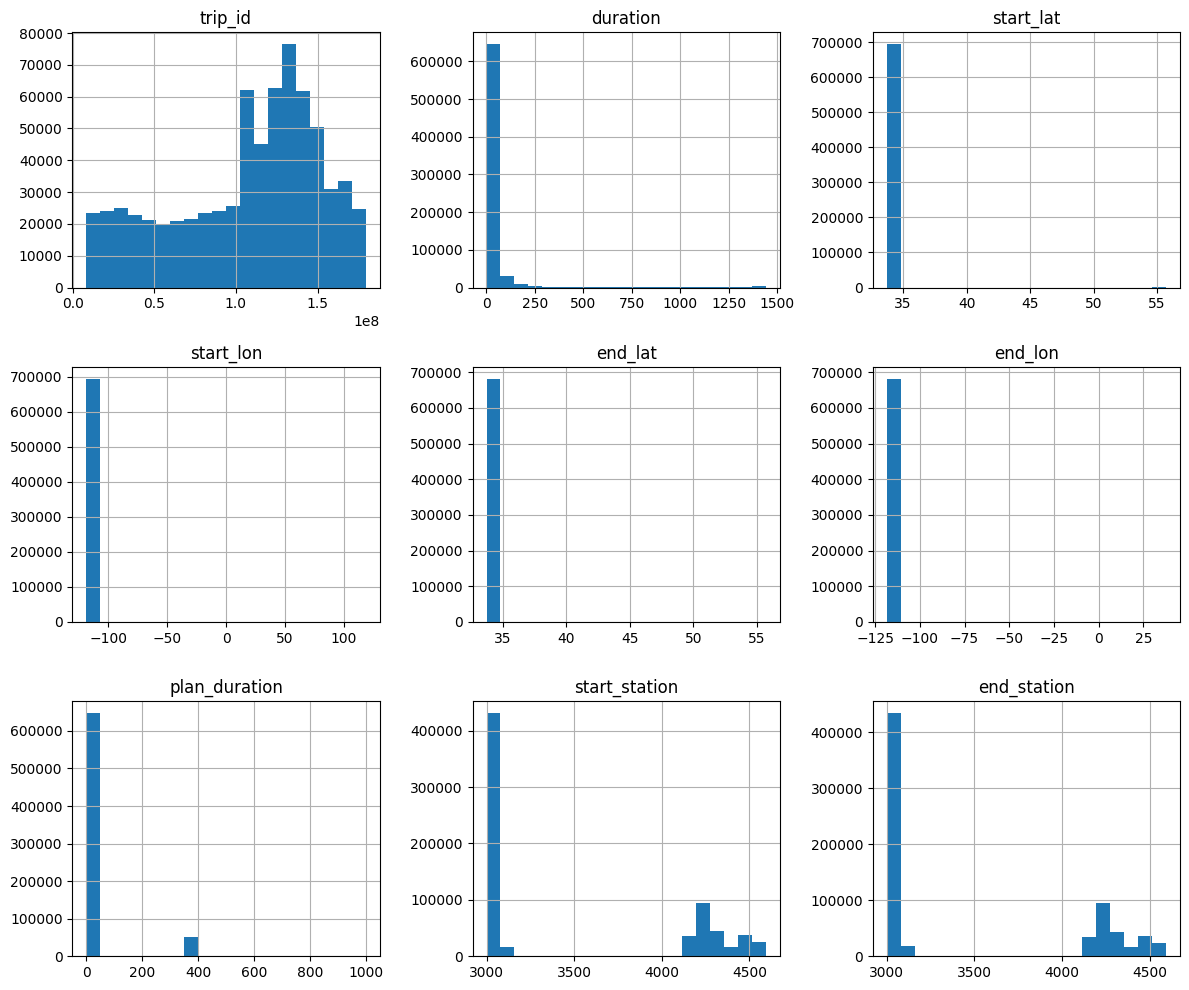


Pairplot for selected columns:


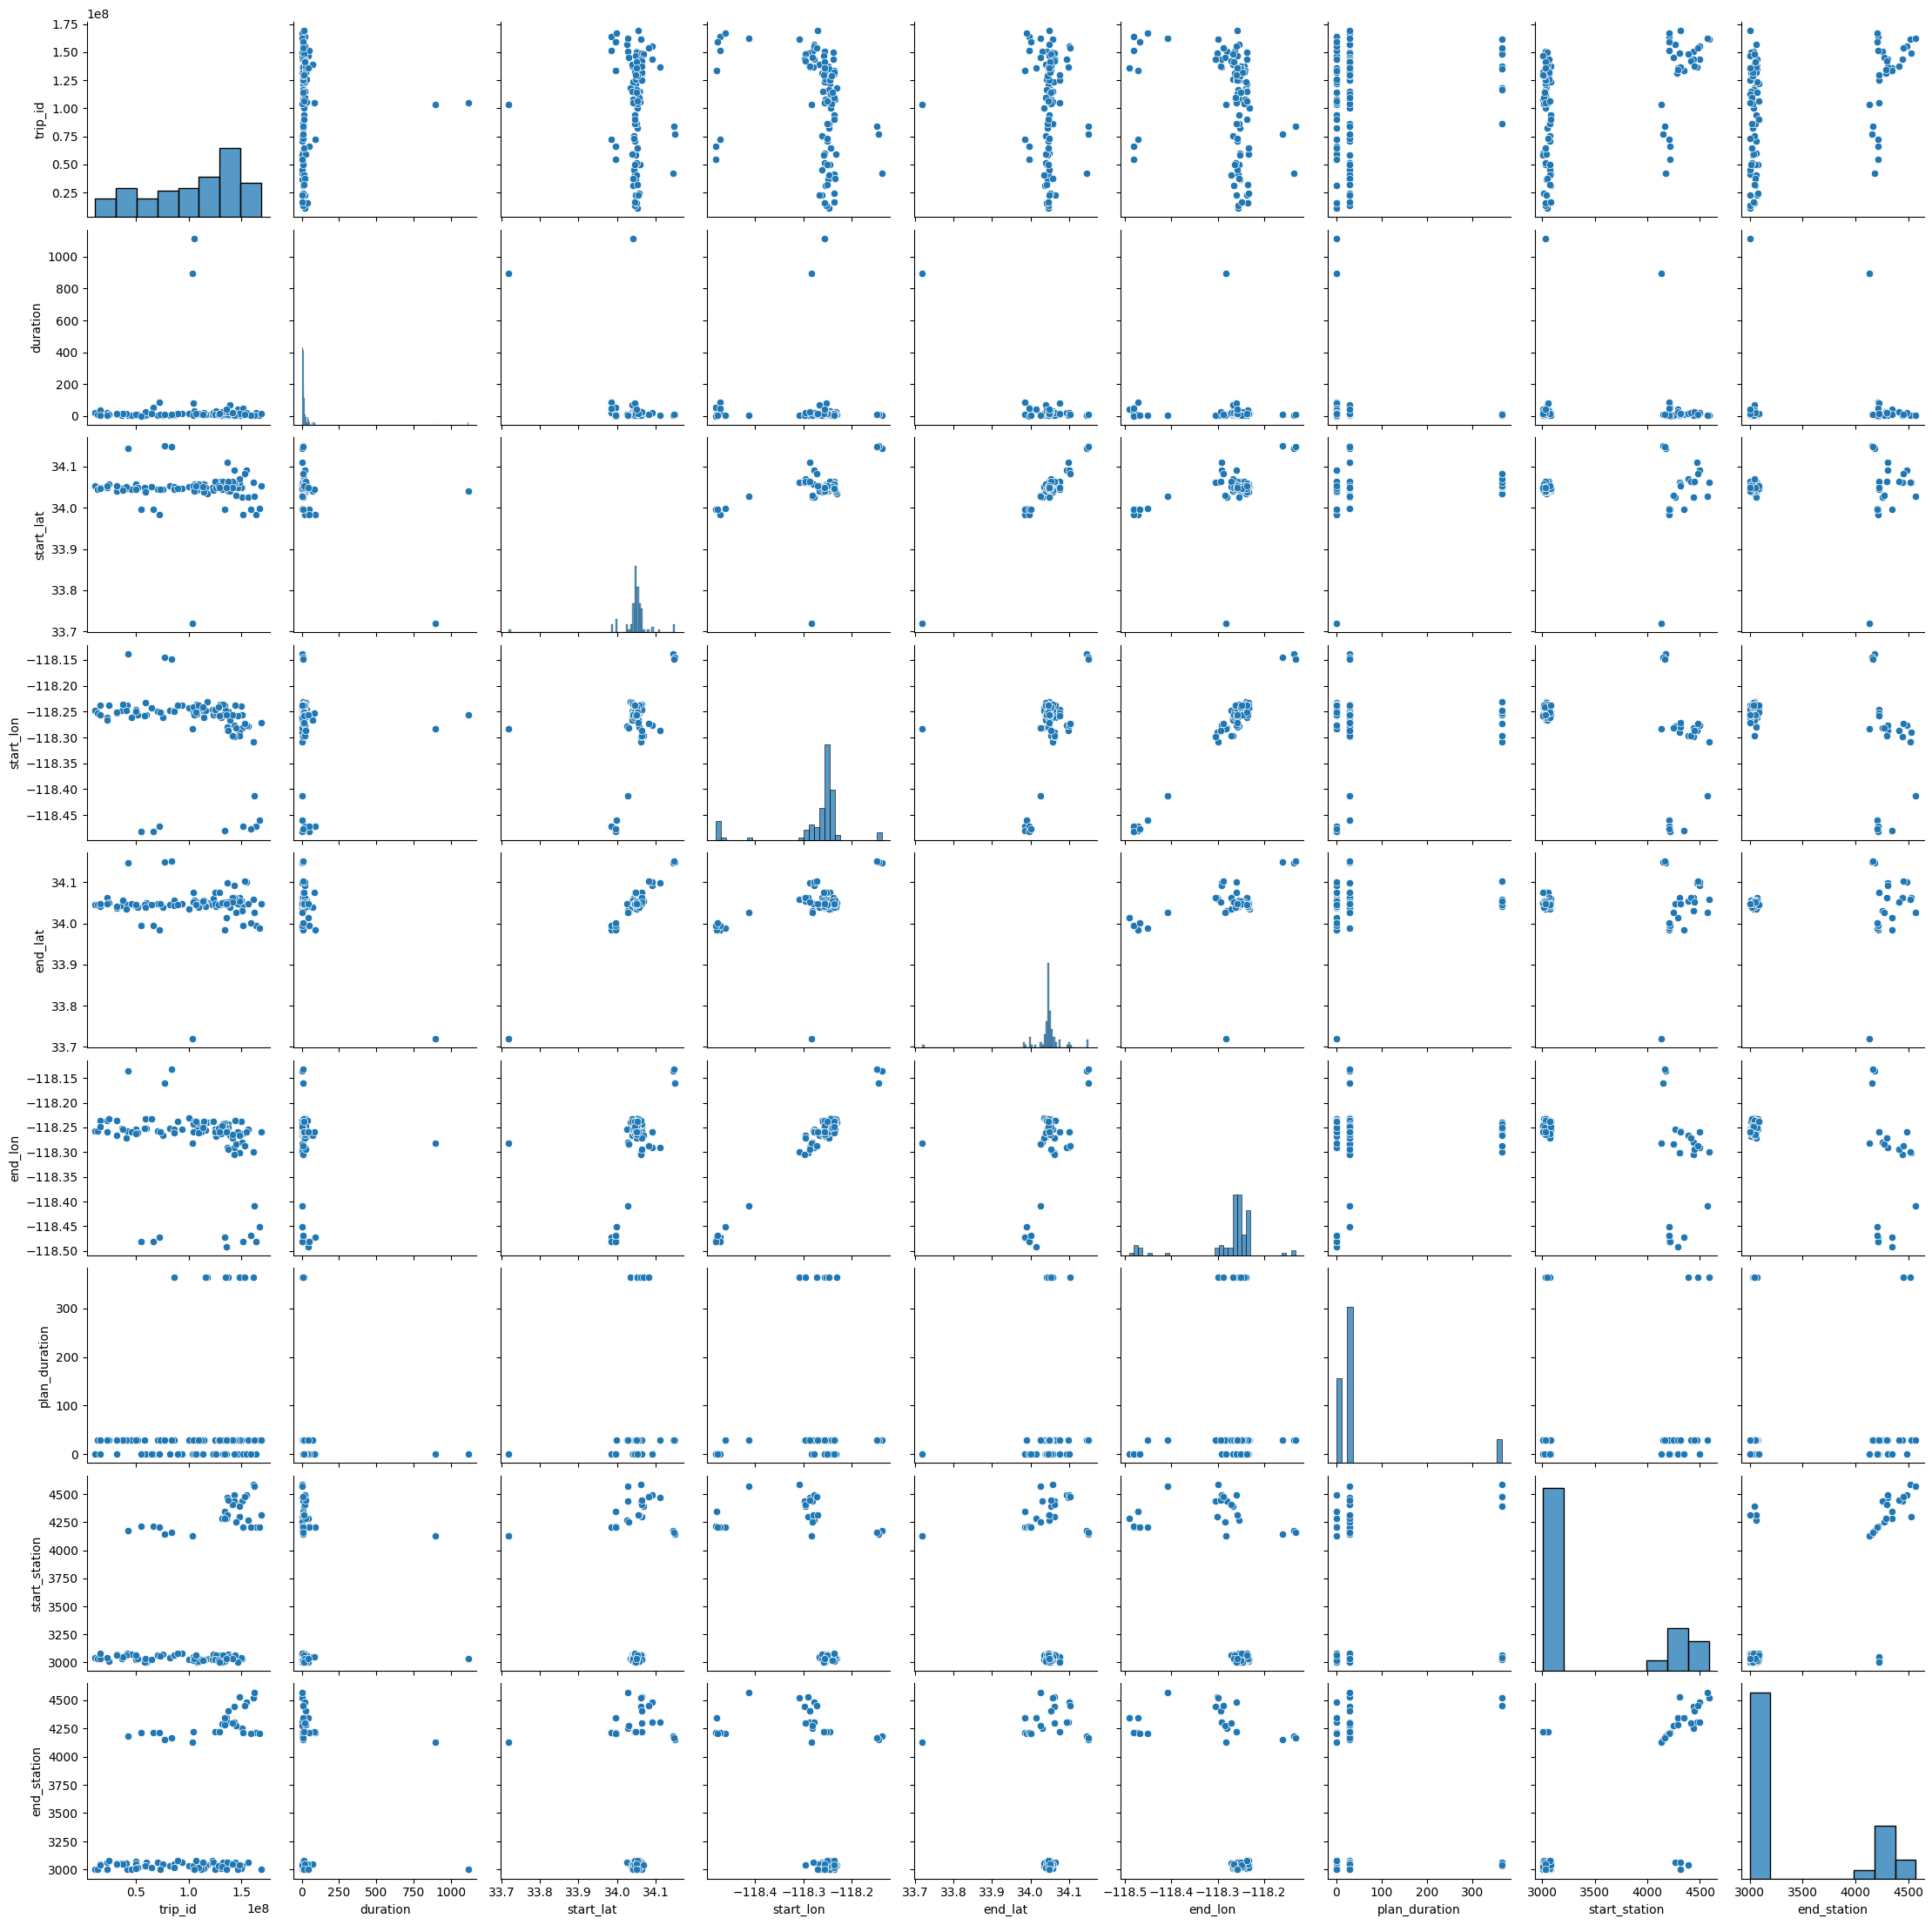

In [114]:
print("Basic Info:")
df_info = df.info()

print("\nValue Counts for Categorical Columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

print("\nCorrelation Heatmap:")
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

print("\nVisualizing Distributions of Numeric Columns:")
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

print("\nPairplot for selected columns:")
sns.pairplot(df[numeric_columns].sample(100))
plt.show()


In [110]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning' 
    elif 12 <= hour < 17:
        return 'Noon
    elif 17 <= hour < 21:
        return 'Evening' 
    else:
        return 'Night'

In [95]:
df['start_time'] = pd.to_datetime(df['start_time'], format='mixed')
df['end_time'] = pd.to_datetime(df['end_time'],format='mixed')
df['year'] = df['start_time'].dt.year
df["bike_id"] = pd.to_numeric(df["bike_id"], errors="coerce")
df = df.dropna()
df['time_of_day'] = df['start_time'].dt.hour.apply(categorize_time)
df['start_time'] = df['start_time'].astype('int64') // 10**9
df['end_time'] = df['end_time'].astype('int64') // 10**9
df = df[df['passholder_type'] != 'Testing']
df.head()


,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station,year,time_of_day
0,101750280,35,1533640800,1533642900,33.748920,-118.275192,33.748920,-118.275192,6530.0,1.0,Round Trip,Walk-up,4127,4127,2018,Morning
1,46560345,32,1505670660,1505672580,34.035679,-118.270813,34.047749,-118.243172,6683.0,0.0,One Way,Walk-up,3057,3062,2017,Evening
2,120016336,6,1555924920,1555925280,34.046070,-118.233093,34.047749,-118.243172,6710.0,30.0,One Way,Monthly Pass,3022,3062,2019,Morning
3,129547190,138,1569151620,1569159900,34.062580,-118.290092,34.059689,-118.294662,17068.0,1.0,One Way,One Day Pass,4304,4311,2019,Morning
4,136619463,14,1580490660,1580491500,34.026291,-118.277687,34.021660,-118.278687,18841.0,30.0,One Way,Monthly Pass,4266,4443,2020,Evening


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675575 entries, 0 to 699999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              675575 non-null  int64  
 1   duration             675575 non-null  int64  
 2   start_time           675575 non-null  int64  
 3   end_time             675575 non-null  int64  
 4   start_lat            675575 non-null  float64
 5   start_lon            675575 non-null  float64
 6   end_lat              675575 non-null  float64
 7   end_lon              675575 non-null  float64
 8   bike_id              675575 non-null  float64
 9   plan_duration        675575 non-null  float64
 10  trip_route_category  675575 non-null  object 
 11  passholder_type      675575 non-null  object 
 12  start_station        675575 non-null  int64  
 13  end_station          675575 non-null  int64  
 14  year                 675575 non-null  int32  
 15  time_of_day          6


Correlation Heatmap:


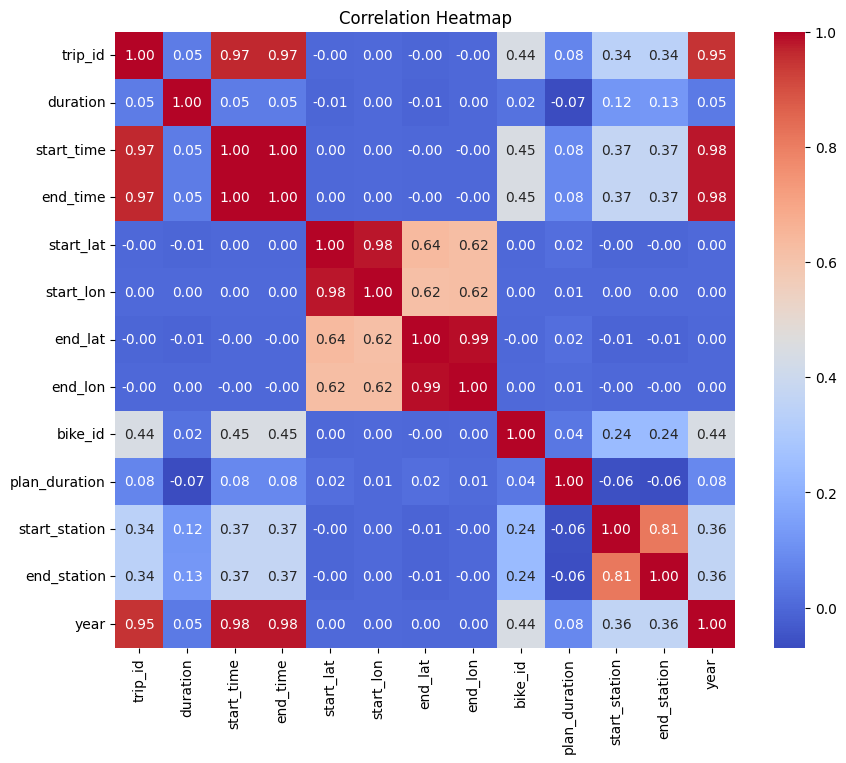

In [97]:
print("\nCorrelation Heatmap:")
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

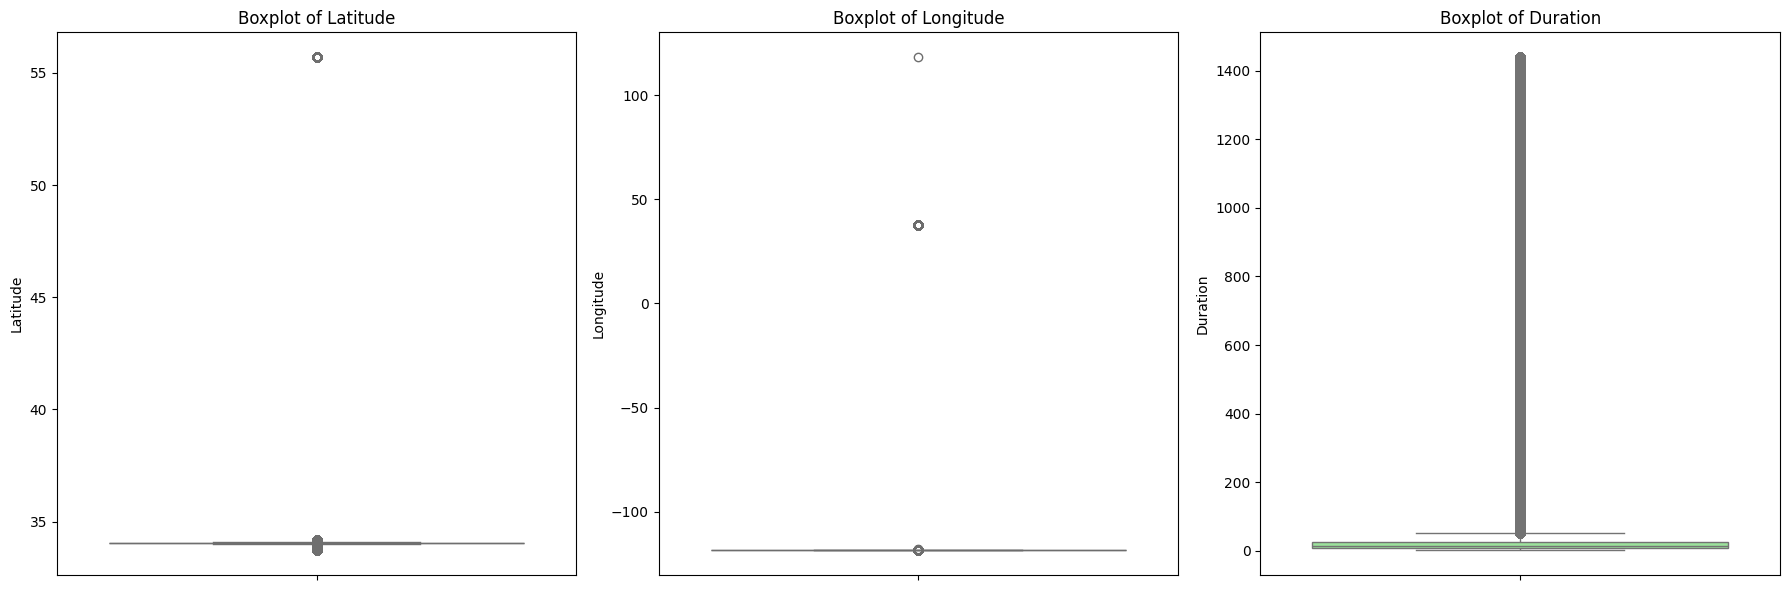

In [99]:
lat_lon_data = pd.DataFrame({
    'Latitude': pd.concat([df['start_lat'], df['end_lat']], ignore_index=True),
    'Longitude': pd.concat([df['start_lon'], df['end_lon']], ignore_index=True),
    'Duration': pd.concat([df['duration'], df['duration']], ignore_index=True)  
})

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=lat_lon_data['Latitude'], color='skyblue')
plt.title('Boxplot of Latitude')
plt.ylabel('Latitude')

plt.subplot(1, 3, 2)
sns.boxplot(y=lat_lon_data['Longitude'], color='salmon')
plt.title('Boxplot of Longitude')
plt.ylabel('Longitude')

plt.subplot(1, 3, 3)
sns.boxplot(y=lat_lon_data['Duration'], color='lightgreen')
plt.title('Boxplot of Duration')
plt.ylabel('Duration')

plt.tight_layout()
plt.show()



In [100]:
df2=df


In [101]:
long_trips = df[df['duration'] > 120]

long_trips_by_type = long_trips.groupby('passholder_type').size()

print("Total trips with duration over 120 minutes, by passholder type:")
print(long_trips_by_type)

Total trips with duration over 120 minutes, by passholder type:
passholder_type
Annual Pass       251
Flex Pass         116
Monthly Pass     3708
One Day Pass     6024
Walk-up         14119
dtype: int64


In [102]:
long_trips = df[df['duration'] > 240]

long_trips_by_type = long_trips.groupby('passholder_type').size()

print("Total trips with duration over 240 minutes, by passholder type:")
print(long_trips_by_type)


Total trips with duration over 240 minutes, by passholder type:
passholder_type
Annual Pass      129
Flex Pass         57
Monthly Pass    1808
One Day Pass    2033
Walk-up         5319
dtype: int64


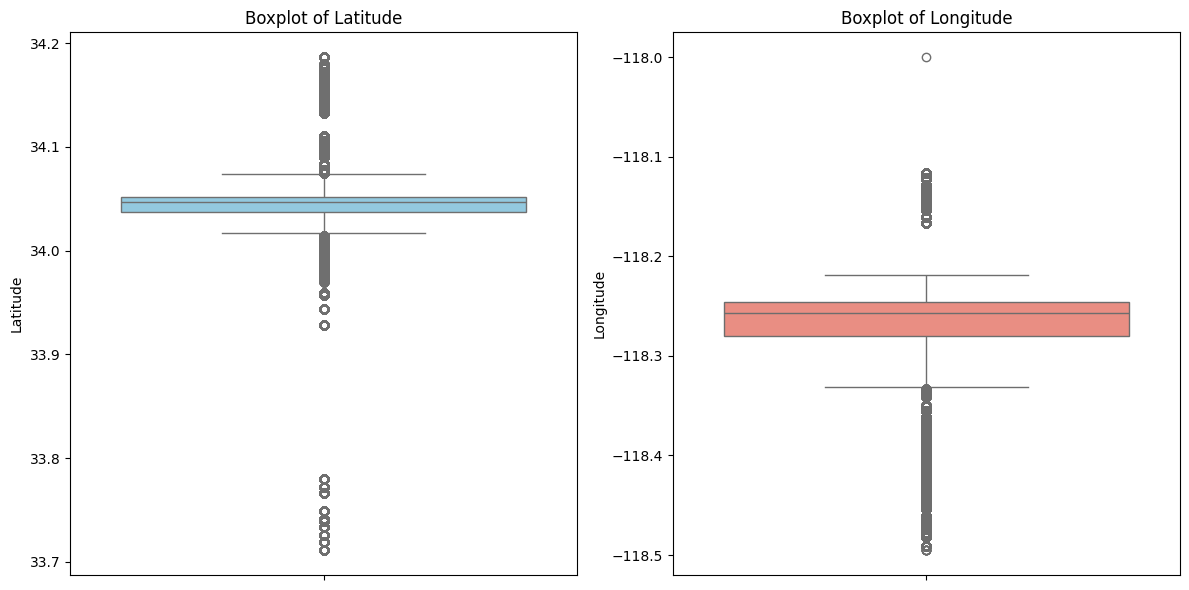

In [104]:
df2_filtered = df2[(df2['start_lat'] <= 40) & (df2['start_lon'] <= 0) & 
                   (df2['end_lat'] <= 40) & (df2['end_lon'] <= 0)]

lat_lon_data2 = pd.DataFrame({
    'Latitude': pd.concat([df2_filtered['start_lat'], df2_filtered['end_lat']], ignore_index=True),
    'Longitude': pd.concat([df2_filtered['start_lon'], df2_filtered['end_lon']], ignore_index=True)
})

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=lat_lon_data2['Latitude'], color='skyblue')
plt.title('Boxplot of Latitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
sns.boxplot(y=lat_lon_data2['Longitude'], color='salmon')
plt.title('Boxplot of Longitude')
plt.ylabel('Longitude')

plt.tight_layout()
plt.show()


In [108]:
df2.to_csv('./df.csv', index=False)